In [1]:
import gzip
import urllib
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

np.set_printoptions(edgeitems=np.inf)
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [2]:
import urllib
import os
if not os.path.isfile('../data/8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","../data/8_faces_train_and_valid.hdf5")
!ls -l ../data/8_faces_train_and_valid.hdf5

-rw-rw-r-- 1 henning henning 132733792 Dez 29 17:40 ../data/8_faces_train_and_valid.hdf5


In [3]:
import h5py
h5f_X = h5py.File('../data/8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'][()]
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'][()]
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'][()]
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'][()]
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


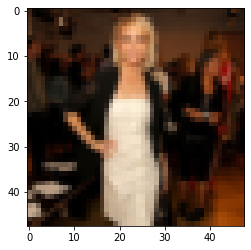

In [4]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
classes = ["Miranda Cosgrove", "Chris Martin", "Emma Stone", "Jamie Foxx", 
           "Steve Jobs", "Zac Efron", "Sandra Oh", "Taryn Manning"]
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n), (250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0], dtype="uint8"))

In [5]:
#Downloading the data, if it does not exist
if not os.path.isfile('../data/8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","../data/8_faces_test.hdf5")
h5f_X = h5py.File('../data/8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'][()]
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'][()]
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [6]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

## a)

In [7]:
n_epochs = 1000
batch_size = 8
lr = 1e-4
model = Sequential()
model.add(Conv2D(15, kernel_size=3, strides=1, input_shape=(48, 48, 3), padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Conv2D(15, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

model.add(Conv2D(30, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Conv2D(30, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=4, strides=4))

model.add(Flatten())
model.add(Dense(300, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(8, activation="softmax"))

model.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 15)        420       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 15)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 30)        0

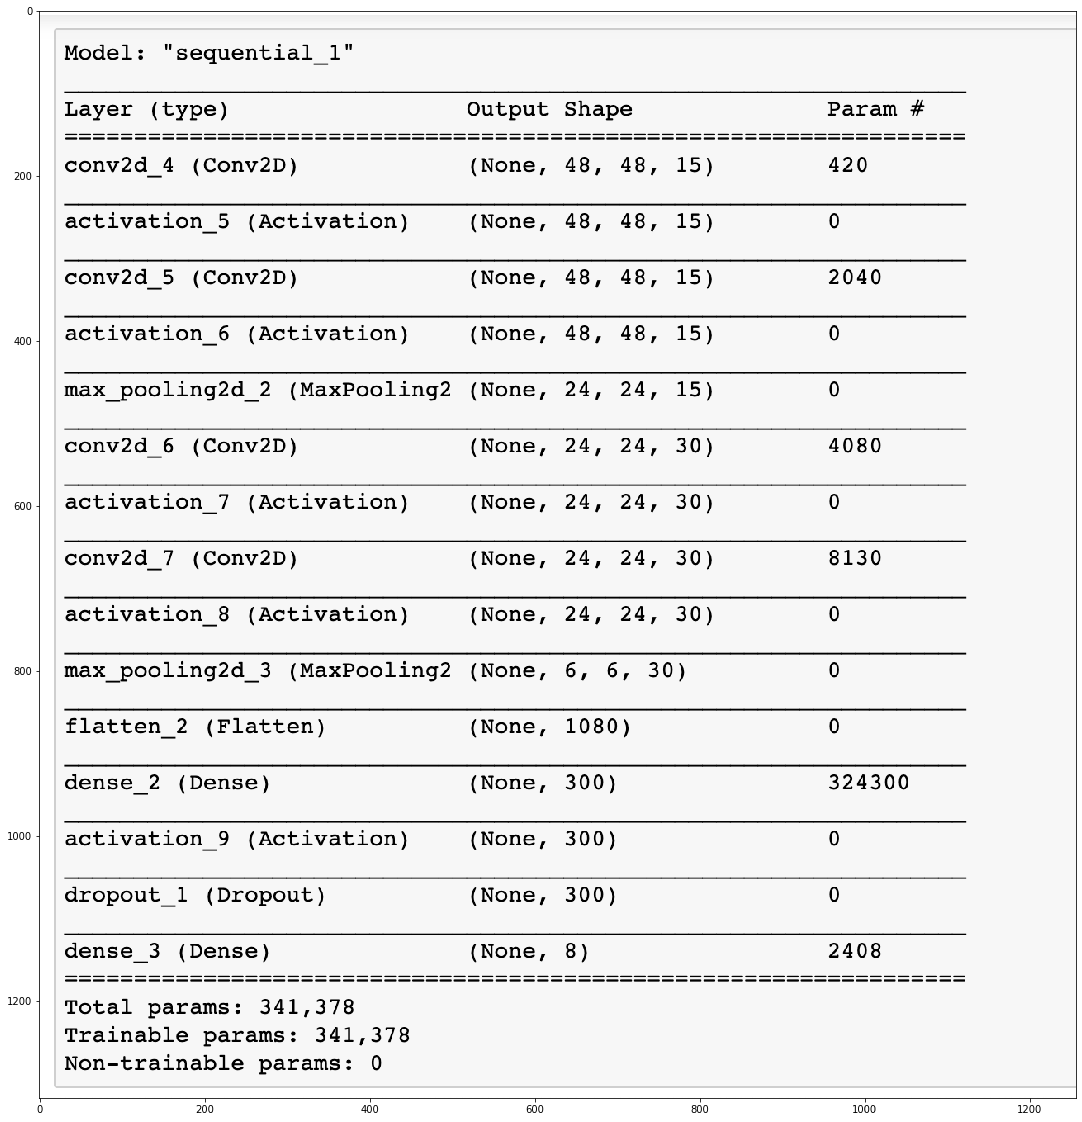

In [8]:
img = plt.imread("https://raw.githubusercontent.com/ioskn/mldl_htwg/master/uebungen/dl_cnn_faces_net.png")
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

In [9]:
x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

history = model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/1000
2000/2000 [==============================] - 3s 1ms/sample - loss: 2.8044 - accuracy: 0.1675 - val_loss: 2.0618 - val_accuracy: 0.2325
Epoch 2/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 1.9817 - accuracy: 0.2645 - val_loss: 1.8827 - val_accuracy: 0.3325
Epoch 3/1000
2000/2000 [==============================] - 1s 503us/sample - loss: 1.8584 - accuracy: 0.3255 - val_loss: 1.8573 - val_accuracy: 0.3575
Epoch 4/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 1.7834 - accuracy: 0.3965 - val_loss: 1.8266 - val_accuracy: 0.3375
Epoch 5/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 1.7438 - accuracy: 0.4130 - val_loss: 1.8607 - val_accuracy: 0.3600
Epoch 6/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 1.6910 - accuracy: 0.4465 - val_loss: 1.7290 - val_accuracy: 0.4350
Epoch 7/1000
2000/2000 [==============================]

2000/2000 [==============================] - 1s 498us/sample - loss: 1.0949 - accuracy: 0.7750 - val_loss: 2.1118 - val_accuracy: 0.5000
Epoch 56/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 1.0739 - accuracy: 0.7715 - val_loss: 2.2224 - val_accuracy: 0.5275
Epoch 57/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 1.0202 - accuracy: 0.8010 - val_loss: 2.1536 - val_accuracy: 0.4975
Epoch 58/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 1.0259 - accuracy: 0.7935 - val_loss: 2.2405 - val_accuracy: 0.5400
Epoch 59/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 1.0604 - accuracy: 0.7840 - val_loss: 2.1928 - val_accuracy: 0.5375
Epoch 60/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 1.0514 - accuracy: 0.7950 - val_loss: 2.2198 - val_accuracy: 0.5075
Epoch 61/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 1.0518 - accuracy: 0.7905

2000/2000 [==============================] - 1s 499us/sample - loss: 0.9399 - accuracy: 0.8370 - val_loss: 2.4301 - val_accuracy: 0.5225
Epoch 110/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.9086 - accuracy: 0.8430 - val_loss: 2.3475 - val_accuracy: 0.5100
Epoch 111/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.9260 - accuracy: 0.8410 - val_loss: 2.4317 - val_accuracy: 0.5275
Epoch 112/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.9156 - accuracy: 0.8495 - val_loss: 2.5034 - val_accuracy: 0.5450
Epoch 113/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.9631 - accuracy: 0.8180 - val_loss: 2.4533 - val_accuracy: 0.5275
Epoch 114/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.9546 - accuracy: 0.8320 - val_loss: 2.4222 - val_accuracy: 0.5100
Epoch 115/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.9401 - accuracy: 

Epoch 163/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.8763 - accuracy: 0.8670 - val_loss: 2.7236 - val_accuracy: 0.5225
Epoch 164/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.8889 - accuracy: 0.8510 - val_loss: 2.3402 - val_accuracy: 0.5075
Epoch 165/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.9320 - accuracy: 0.8435 - val_loss: 2.6505 - val_accuracy: 0.5150
Epoch 166/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.8808 - accuracy: 0.8570 - val_loss: 2.5371 - val_accuracy: 0.5000
Epoch 167/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.9271 - accuracy: 0.8385 - val_loss: 2.5287 - val_accuracy: 0.5350
Epoch 168/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.9031 - accuracy: 0.8430 - val_loss: 2.4627 - val_accuracy: 0.5075
Epoch 169/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.88

Epoch 217/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.8669 - accuracy: 0.8605 - val_loss: 2.6418 - val_accuracy: 0.5200
Epoch 218/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.8348 - accuracy: 0.8660 - val_loss: 2.5745 - val_accuracy: 0.4800
Epoch 219/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.8688 - accuracy: 0.8515 - val_loss: 2.4432 - val_accuracy: 0.5225
Epoch 220/1000
2000/2000 [==============================] - 1s 524us/sample - loss: 0.9196 - accuracy: 0.8465 - val_loss: 2.4947 - val_accuracy: 0.5350
Epoch 221/1000
2000/2000 [==============================] - 1s 529us/sample - loss: 0.8678 - accuracy: 0.8650 - val_loss: 2.5761 - val_accuracy: 0.5325
Epoch 222/1000
2000/2000 [==============================] - 1s 527us/sample - loss: 0.8831 - accuracy: 0.8455 - val_loss: 2.4968 - val_accuracy: 0.5175
Epoch 223/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.86

Epoch 271/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.8480 - accuracy: 0.8660 - val_loss: 2.6054 - val_accuracy: 0.5300
Epoch 272/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.8534 - accuracy: 0.8660 - val_loss: 2.5796 - val_accuracy: 0.5225
Epoch 273/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.8623 - accuracy: 0.8645 - val_loss: 2.3180 - val_accuracy: 0.5475
Epoch 274/1000
2000/2000 [==============================] - 1s 502us/sample - loss: 0.8563 - accuracy: 0.8665 - val_loss: 2.5239 - val_accuracy: 0.5225
Epoch 275/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.8717 - accuracy: 0.8585 - val_loss: 2.7072 - val_accuracy: 0.4975
Epoch 276/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.8766 - accuracy: 0.8490 - val_loss: 2.3613 - val_accuracy: 0.5350
Epoch 277/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.84

Epoch 325/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.8584 - accuracy: 0.8550 - val_loss: 2.6370 - val_accuracy: 0.5275
Epoch 326/1000
2000/2000 [==============================] - 1s 503us/sample - loss: 0.9038 - accuracy: 0.8520 - val_loss: 2.6170 - val_accuracy: 0.5425
Epoch 327/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.8240 - accuracy: 0.8740 - val_loss: 2.7188 - val_accuracy: 0.5175
Epoch 328/1000
2000/2000 [==============================] - 1s 506us/sample - loss: 0.8052 - accuracy: 0.8750 - val_loss: 2.7097 - val_accuracy: 0.5350
Epoch 329/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.8579 - accuracy: 0.8665 - val_loss: 2.6140 - val_accuracy: 0.5550
Epoch 330/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.8265 - accuracy: 0.8650 - val_loss: 2.6112 - val_accuracy: 0.5150
Epoch 331/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.84

Epoch 379/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.8372 - accuracy: 0.8645 - val_loss: 2.5217 - val_accuracy: 0.5275
Epoch 380/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.8179 - accuracy: 0.8785 - val_loss: 2.7621 - val_accuracy: 0.5250
Epoch 381/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.7962 - accuracy: 0.8850 - val_loss: 2.8293 - val_accuracy: 0.5275
Epoch 382/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.8366 - accuracy: 0.8680 - val_loss: 2.7378 - val_accuracy: 0.5200
Epoch 383/1000
2000/2000 [==============================] - 1s 501us/sample - loss: 0.7787 - accuracy: 0.8880 - val_loss: 2.8133 - val_accuracy: 0.5050
Epoch 384/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.8450 - accuracy: 0.8605 - val_loss: 2.7766 - val_accuracy: 0.5300
Epoch 385/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.91

Epoch 433/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.7995 - accuracy: 0.8800 - val_loss: 2.7690 - val_accuracy: 0.5125
Epoch 434/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.7771 - accuracy: 0.8865 - val_loss: 2.6961 - val_accuracy: 0.5125
Epoch 435/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.7765 - accuracy: 0.8870 - val_loss: 2.4754 - val_accuracy: 0.5150
Epoch 436/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.7632 - accuracy: 0.8925 - val_loss: 2.6695 - val_accuracy: 0.5625
Epoch 437/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.8259 - accuracy: 0.8675 - val_loss: 2.6244 - val_accuracy: 0.5325
Epoch 438/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.8251 - accuracy: 0.8720 - val_loss: 2.5099 - val_accuracy: 0.5050
Epoch 439/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.82

Epoch 487/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.8036 - accuracy: 0.8770 - val_loss: 2.4814 - val_accuracy: 0.5175
Epoch 488/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.7969 - accuracy: 0.8720 - val_loss: 2.5213 - val_accuracy: 0.5375
Epoch 489/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.7764 - accuracy: 0.8910 - val_loss: 2.7606 - val_accuracy: 0.5075
Epoch 490/1000
2000/2000 [==============================] - 1s 501us/sample - loss: 0.8074 - accuracy: 0.8720 - val_loss: 2.6410 - val_accuracy: 0.5000
Epoch 491/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.7577 - accuracy: 0.8890 - val_loss: 2.9427 - val_accuracy: 0.4950
Epoch 492/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.7793 - accuracy: 0.8805 - val_loss: 2.6740 - val_accuracy: 0.5225
Epoch 493/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.78

Epoch 541/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7804 - accuracy: 0.8925 - val_loss: 2.5949 - val_accuracy: 0.5325
Epoch 542/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.8963 - accuracy: 0.8580 - val_loss: 2.4633 - val_accuracy: 0.5500
Epoch 543/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.7969 - accuracy: 0.8995 - val_loss: 2.6280 - val_accuracy: 0.5125
Epoch 544/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.7511 - accuracy: 0.8975 - val_loss: 2.5986 - val_accuracy: 0.5325
Epoch 545/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.8069 - accuracy: 0.8700 - val_loss: 2.5597 - val_accuracy: 0.5300
Epoch 546/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7469 - accuracy: 0.9010 - val_loss: 2.6560 - val_accuracy: 0.5400
Epoch 547/1000
2000/2000 [==============================] - 1s 503us/sample - loss: 0.75

Epoch 595/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7284 - accuracy: 0.9090 - val_loss: 2.7624 - val_accuracy: 0.4925
Epoch 596/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7825 - accuracy: 0.8845 - val_loss: 2.6530 - val_accuracy: 0.5475
Epoch 597/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.7200 - accuracy: 0.9010 - val_loss: 2.8817 - val_accuracy: 0.5150
Epoch 598/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.8017 - accuracy: 0.8700 - val_loss: 2.5680 - val_accuracy: 0.5025
Epoch 599/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7775 - accuracy: 0.8905 - val_loss: 2.9787 - val_accuracy: 0.5500
Epoch 600/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7762 - accuracy: 0.8830 - val_loss: 2.6167 - val_accuracy: 0.5375
Epoch 601/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.74

Epoch 649/1000
2000/2000 [==============================] - 1s 501us/sample - loss: 0.7381 - accuracy: 0.8985 - val_loss: 2.8679 - val_accuracy: 0.5075
Epoch 650/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.7835 - accuracy: 0.8855 - val_loss: 2.7713 - val_accuracy: 0.5200
Epoch 651/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7716 - accuracy: 0.8900 - val_loss: 2.6230 - val_accuracy: 0.5325
Epoch 652/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7344 - accuracy: 0.8990 - val_loss: 2.7394 - val_accuracy: 0.5175
Epoch 653/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7694 - accuracy: 0.8925 - val_loss: 2.7781 - val_accuracy: 0.5200
Epoch 654/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.7753 - accuracy: 0.8910 - val_loss: 2.6338 - val_accuracy: 0.5150
Epoch 655/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.76

Epoch 703/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7792 - accuracy: 0.8905 - val_loss: 2.8757 - val_accuracy: 0.5225
Epoch 704/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7953 - accuracy: 0.8855 - val_loss: 2.4729 - val_accuracy: 0.5250
Epoch 705/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.7540 - accuracy: 0.8920 - val_loss: 2.5801 - val_accuracy: 0.4975
Epoch 706/1000
2000/2000 [==============================] - 1s 502us/sample - loss: 0.7400 - accuracy: 0.8985 - val_loss: 2.6244 - val_accuracy: 0.5250
Epoch 707/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7382 - accuracy: 0.9005 - val_loss: 2.5943 - val_accuracy: 0.5275
Epoch 708/1000
2000/2000 [==============================] - 1s 501us/sample - loss: 0.7594 - accuracy: 0.8915 - val_loss: 2.6190 - val_accuracy: 0.5475
Epoch 709/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.74

Epoch 757/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7726 - accuracy: 0.8845 - val_loss: 2.7145 - val_accuracy: 0.5375
Epoch 758/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.7314 - accuracy: 0.9015 - val_loss: 2.7252 - val_accuracy: 0.5600
Epoch 759/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7542 - accuracy: 0.8960 - val_loss: 2.6168 - val_accuracy: 0.5375
Epoch 760/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.7414 - accuracy: 0.9055 - val_loss: 2.8142 - val_accuracy: 0.5225
Epoch 761/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7545 - accuracy: 0.8920 - val_loss: 2.7480 - val_accuracy: 0.5200
Epoch 762/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.7676 - accuracy: 0.8960 - val_loss: 2.8401 - val_accuracy: 0.5150
Epoch 763/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.76

Epoch 811/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.7412 - accuracy: 0.8970 - val_loss: 2.6266 - val_accuracy: 0.5425
Epoch 812/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.7309 - accuracy: 0.9015 - val_loss: 2.7824 - val_accuracy: 0.5125
Epoch 813/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.6991 - accuracy: 0.9050 - val_loss: 2.9622 - val_accuracy: 0.5050
Epoch 814/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.7565 - accuracy: 0.8860 - val_loss: 2.7646 - val_accuracy: 0.5000
Epoch 815/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.7821 - accuracy: 0.8810 - val_loss: 2.6795 - val_accuracy: 0.5000
Epoch 816/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.7689 - accuracy: 0.8915 - val_loss: 2.8894 - val_accuracy: 0.4750
Epoch 817/1000
2000/2000 [==============================] - 1s 502us/sample - loss: 0.74

Epoch 865/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7755 - accuracy: 0.8750 - val_loss: 2.5662 - val_accuracy: 0.5550
Epoch 866/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.7321 - accuracy: 0.9035 - val_loss: 2.7673 - val_accuracy: 0.5325
Epoch 867/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7543 - accuracy: 0.8860 - val_loss: 2.4837 - val_accuracy: 0.4925
Epoch 868/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7389 - accuracy: 0.9020 - val_loss: 2.6467 - val_accuracy: 0.5400
Epoch 869/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7351 - accuracy: 0.8965 - val_loss: 2.7214 - val_accuracy: 0.5475
Epoch 870/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7516 - accuracy: 0.8905 - val_loss: 2.7825 - val_accuracy: 0.5250
Epoch 871/1000
2000/2000 [==============================] - 1s 494us/sample - loss: 0.76

Epoch 919/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.7217 - accuracy: 0.8965 - val_loss: 2.6575 - val_accuracy: 0.5325
Epoch 920/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7256 - accuracy: 0.8995 - val_loss: 2.6311 - val_accuracy: 0.5325
Epoch 921/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7122 - accuracy: 0.9055 - val_loss: 2.7249 - val_accuracy: 0.5300
Epoch 922/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.7584 - accuracy: 0.8870 - val_loss: 2.7441 - val_accuracy: 0.5000
Epoch 923/1000
2000/2000 [==============================] - 1s 499us/sample - loss: 0.7641 - accuracy: 0.8860 - val_loss: 2.5673 - val_accuracy: 0.5250
Epoch 924/1000
2000/2000 [==============================] - 1s 500us/sample - loss: 0.7362 - accuracy: 0.8970 - val_loss: 2.8088 - val_accuracy: 0.5125
Epoch 925/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.69

Epoch 973/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7401 - accuracy: 0.8890 - val_loss: 2.8601 - val_accuracy: 0.4750
Epoch 974/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.7777 - accuracy: 0.8920 - val_loss: 2.6647 - val_accuracy: 0.5200
Epoch 975/1000
2000/2000 [==============================] - 1s 496us/sample - loss: 0.7386 - accuracy: 0.8940 - val_loss: 2.5853 - val_accuracy: 0.4850
Epoch 976/1000
2000/2000 [==============================] - 1s 498us/sample - loss: 0.6961 - accuracy: 0.9120 - val_loss: 2.7506 - val_accuracy: 0.5000
Epoch 977/1000
2000/2000 [==============================] - 1s 495us/sample - loss: 0.6847 - accuracy: 0.9105 - val_loss: 2.9856 - val_accuracy: 0.5125
Epoch 978/1000
2000/2000 [==============================] - 1s 501us/sample - loss: 0.7442 - accuracy: 0.8860 - val_loss: 2.8722 - val_accuracy: 0.4625
Epoch 979/1000
2000/2000 [==============================] - 1s 497us/sample - loss: 0.72

In [10]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.6353904356956482
Accuracy train set: 0.9739999771118164

Loss validation set: 2.8776324081420896
Accuracy validation set: 0.4975000023841858



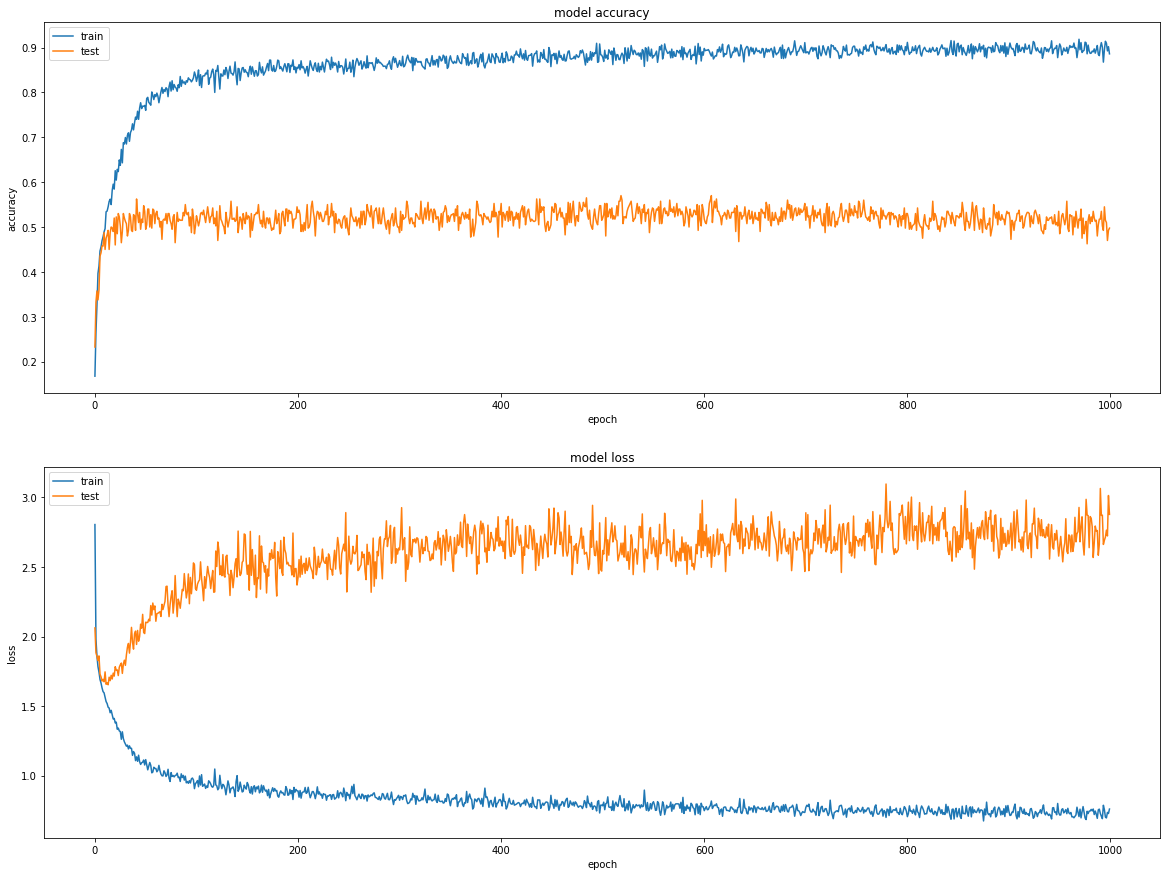

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [12]:
y_pred = model.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[34  1  6  2  1  0  3  3]
 [ 1 12  6  6  5  6  5  9]
 [ 3  1 25  3  1  1  2 14]
 [ 2  5  4 32  0  2  1  4]
 [ 1  1  1  5 33  1  2  6]
 [ 2  5  2  6  1 17  8  9]
 [ 7  1  5  1  3  2 24  7]
 [ 2  7  6  5  2  4  2 22]]


In [13]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.65      0.68      0.67        50
    Chris Martin       0.36      0.24      0.29        50
      Emma Stone       0.45      0.50      0.48        50
      Jamie Foxx       0.53      0.64      0.58        50
      Steve Jobs       0.72      0.66      0.69        50
       Zac Efron       0.52      0.34      0.41        50
       Sandra Oh       0.51      0.48      0.49        50
   Taryn Manning       0.30      0.44      0.35        50

        accuracy                           0.50       400
       macro avg       0.51      0.50      0.50       400
    weighted avg       0.51      0.50      0.50       400



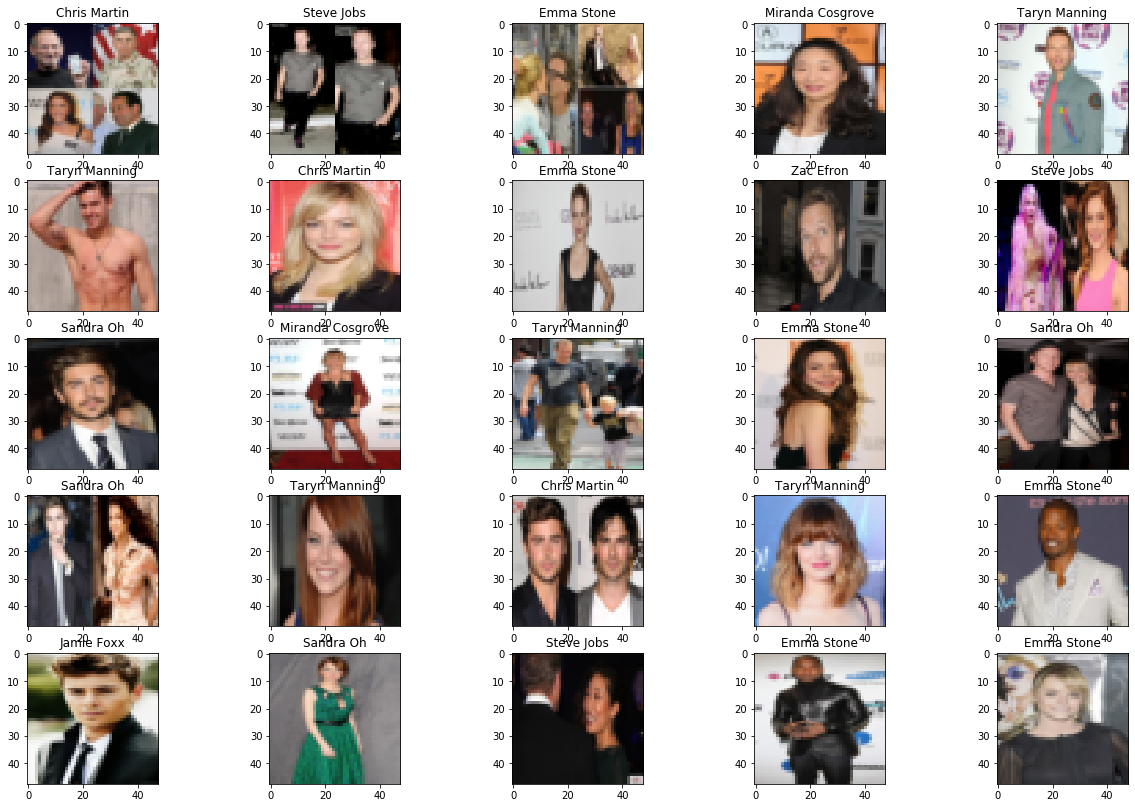

In [14]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1

## b)

In [15]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [16]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512, activation='softmax', name='my_dense1')(fc1)
fc2 = Dense(512, activation='softmax', name='my_dense2')(fc1)
fc3 = Dense(100, activation='softmax', name='my_dense3')(fc2)
fc4 = Dense(8, activation='softmax', name='my_dense4')(fc3)

model_trans = tf.compat.v1.keras.Model(base_model.input, fc4)
model_trans.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [17]:
for layer in model_trans.layers:
    if layer.name.startswith('my_dense'):
        layer.trainable = True
        print(f"Set {layer.name} to trainable.")
    else:
        layer.trainable = False
print()
model_trans.summary()

Set my_dense1 to trainable.
Set my_dense2 to trainable.
Set my_dense3 to trainable.
Set my_dense4 to trainable.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________

In [18]:
n_epochs = 1000
batch_size = 8
lr = 1e-4

x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

model_trans.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
history = model_trans.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/1000
2000/2000 [==============================] - 5s 2ms/sample - loss: 2.0804 - accuracy: 0.1135 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0801 - accuracy: 0.1155 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0806 - accuracy: 0.1140 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0802 - accuracy: 0.1155 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0802 - accuracy: 0.1105 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0803 - accuracy: 0.1075 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 7/1000
2000/2000 [==============================] - 4s 2ms/

Epoch 56/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.3096 - accuracy: 0.4865 - val_loss: 1.8849 - val_accuracy: 0.3125
Epoch 57/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2985 - accuracy: 0.4995 - val_loss: 1.8744 - val_accuracy: 0.3075
Epoch 58/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2950 - accuracy: 0.4925 - val_loss: 1.8711 - val_accuracy: 0.3175
Epoch 59/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2831 - accuracy: 0.5045 - val_loss: 1.8948 - val_accuracy: 0.3175
Epoch 60/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2731 - accuracy: 0.5100 - val_loss: 1.9068 - val_accuracy: 0.3075
Epoch 61/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2722 - accuracy: 0.5110 - val_loss: 1.8983 - val_accuracy: 0.3150
Epoch 62/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2639 - accuracy: 0.5245

Epoch 111/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9860 - accuracy: 0.6700 - val_loss: 2.2170 - val_accuracy: 0.3575
Epoch 112/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9795 - accuracy: 0.6675 - val_loss: 2.2250 - val_accuracy: 0.3375
Epoch 113/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9714 - accuracy: 0.6825 - val_loss: 2.2470 - val_accuracy: 0.3550
Epoch 114/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9762 - accuracy: 0.6610 - val_loss: 2.2395 - val_accuracy: 0.3400
Epoch 115/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9624 - accuracy: 0.6790 - val_loss: 2.2478 - val_accuracy: 0.3450
Epoch 116/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9552 - accuracy: 0.6815 - val_loss: 2.2612 - val_accuracy: 0.3500
Epoch 117/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9548 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7477 - accuracy: 0.7485 - val_loss: 2.6038 - val_accuracy: 0.3725
Epoch 166/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7553 - accuracy: 0.7425 - val_loss: 2.6520 - val_accuracy: 0.3725
Epoch 167/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7443 - accuracy: 0.7510 - val_loss: 2.6201 - val_accuracy: 0.3775
Epoch 168/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7401 - accuracy: 0.7490 - val_loss: 2.6435 - val_accuracy: 0.3700
Epoch 169/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7470 - accuracy: 0.7450 - val_loss: 2.6425 - val_accuracy: 0.3825
Epoch 170/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7358 - accuracy: 0.7495 - val_loss: 2.6318 - val_accuracy: 0.3775
Epoch 171/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7260 - accuracy: 0.7555 - val_l

Epoch 220/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.6019 - accuracy: 0.8245 - val_loss: 2.9506 - val_accuracy: 0.4275
Epoch 221/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5847 - accuracy: 0.8360 - val_loss: 2.9615 - val_accuracy: 0.4175
Epoch 222/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5813 - accuracy: 0.8415 - val_loss: 2.9889 - val_accuracy: 0.4175
Epoch 223/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5859 - accuracy: 0.8410 - val_loss: 2.9569 - val_accuracy: 0.4200
Epoch 224/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5839 - accuracy: 0.8425 - val_loss: 3.0139 - val_accuracy: 0.4250
Epoch 225/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5866 - accuracy: 0.8425 - val_loss: 3.0046 - val_accuracy: 0.4350
Epoch 226/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.6014 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4908 - accuracy: 0.8750 - val_loss: 3.2375 - val_accuracy: 0.4275
Epoch 275/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4990 - accuracy: 0.8735 - val_loss: 3.2276 - val_accuracy: 0.4325
Epoch 276/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5023 - accuracy: 0.8665 - val_loss: 3.2882 - val_accuracy: 0.4225
Epoch 277/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5121 - accuracy: 0.8660 - val_loss: 3.2279 - val_accuracy: 0.4275
Epoch 278/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4843 - accuracy: 0.8790 - val_loss: 3.2603 - val_accuracy: 0.4250
Epoch 279/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4809 - accuracy: 0.8785 - val_loss: 3.2078 - val_accuracy: 0.4275
Epoch 280/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.5107 - accuracy: 0.8695 - val_l

Epoch 329/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4194 - accuracy: 0.8970 - val_loss: 3.5287 - val_accuracy: 0.4400
Epoch 330/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4145 - accuracy: 0.8965 - val_loss: 3.5234 - val_accuracy: 0.4350
Epoch 331/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4154 - accuracy: 0.8955 - val_loss: 3.5691 - val_accuracy: 0.4300
Epoch 332/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4168 - accuracy: 0.8980 - val_loss: 3.4957 - val_accuracy: 0.4200
Epoch 333/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4126 - accuracy: 0.8965 - val_loss: 3.5311 - val_accuracy: 0.4200
Epoch 334/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4085 - accuracy: 0.9010 - val_loss: 3.5142 - val_accuracy: 0.4350
Epoch 335/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4045 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3639 - accuracy: 0.9100 - val_loss: 3.8400 - val_accuracy: 0.4100
Epoch 384/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3625 - accuracy: 0.9110 - val_loss: 3.7534 - val_accuracy: 0.4225
Epoch 385/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3700 - accuracy: 0.9045 - val_loss: 3.8362 - val_accuracy: 0.4175
Epoch 386/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3896 - accuracy: 0.8995 - val_loss: 3.8392 - val_accuracy: 0.4150
Epoch 387/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.4026 - accuracy: 0.8930 - val_loss: 3.7793 - val_accuracy: 0.4300
Epoch 388/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3620 - accuracy: 0.9090 - val_loss: 3.7739 - val_accuracy: 0.4275
Epoch 389/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3528 - accuracy: 0.9130 - val_l

Epoch 438/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3343 - accuracy: 0.9115 - val_loss: 3.8815 - val_accuracy: 0.4175
Epoch 439/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3256 - accuracy: 0.9170 - val_loss: 3.8826 - val_accuracy: 0.4175
Epoch 440/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3325 - accuracy: 0.9125 - val_loss: 3.9194 - val_accuracy: 0.4250
Epoch 441/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3434 - accuracy: 0.9085 - val_loss: 3.9980 - val_accuracy: 0.4300
Epoch 442/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3371 - accuracy: 0.9105 - val_loss: 3.9323 - val_accuracy: 0.4175
Epoch 443/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3333 - accuracy: 0.9120 - val_loss: 3.8783 - val_accuracy: 0.4100
Epoch 444/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3340 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3319 - accuracy: 0.9100 - val_loss: 4.0709 - val_accuracy: 0.4400
Epoch 493/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3265 - accuracy: 0.9135 - val_loss: 4.1640 - val_accuracy: 0.4000
Epoch 494/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3177 - accuracy: 0.9100 - val_loss: 4.1019 - val_accuracy: 0.4250
Epoch 495/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2979 - accuracy: 0.9215 - val_loss: 4.0903 - val_accuracy: 0.4200
Epoch 496/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2975 - accuracy: 0.9205 - val_loss: 4.1119 - val_accuracy: 0.4300
Epoch 497/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3166 - accuracy: 0.9175 - val_loss: 4.1071 - val_accuracy: 0.4275
Epoch 498/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3073 - accuracy: 0.9190 - val_l

Epoch 547/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2884 - accuracy: 0.9265 - val_loss: 4.1886 - val_accuracy: 0.4075
Epoch 548/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2971 - accuracy: 0.9245 - val_loss: 4.3132 - val_accuracy: 0.4025
Epoch 549/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2981 - accuracy: 0.9205 - val_loss: 4.2175 - val_accuracy: 0.4200
Epoch 550/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2771 - accuracy: 0.9295 - val_loss: 4.2491 - val_accuracy: 0.4150
Epoch 551/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2834 - accuracy: 0.9250 - val_loss: 4.2934 - val_accuracy: 0.4200
Epoch 552/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3064 - accuracy: 0.9190 - val_loss: 4.3242 - val_accuracy: 0.4150
Epoch 553/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2807 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2607 - accuracy: 0.9305 - val_loss: 4.4331 - val_accuracy: 0.4175
Epoch 602/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2542 - accuracy: 0.9355 - val_loss: 4.4391 - val_accuracy: 0.4175
Epoch 603/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2594 - accuracy: 0.9330 - val_loss: 4.3836 - val_accuracy: 0.4175
Epoch 604/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2642 - accuracy: 0.9315 - val_loss: 4.4001 - val_accuracy: 0.4200
Epoch 605/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2917 - accuracy: 0.9205 - val_loss: 4.4172 - val_accuracy: 0.4150
Epoch 606/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2873 - accuracy: 0.9250 - val_loss: 4.5439 - val_accuracy: 0.4125
Epoch 607/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2806 - accuracy: 0.9260 - val_l

Epoch 656/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2318 - accuracy: 0.9385 - val_loss: 4.5934 - val_accuracy: 0.4375
Epoch 657/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2273 - accuracy: 0.9415 - val_loss: 4.5433 - val_accuracy: 0.4300
Epoch 658/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2318 - accuracy: 0.9380 - val_loss: 4.5664 - val_accuracy: 0.4300
Epoch 659/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2341 - accuracy: 0.9385 - val_loss: 4.5355 - val_accuracy: 0.4300
Epoch 660/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2409 - accuracy: 0.9360 - val_loss: 4.6421 - val_accuracy: 0.4250
Epoch 661/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2455 - accuracy: 0.9350 - val_loss: 4.5989 - val_accuracy: 0.4300
Epoch 662/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2448 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2208 - accuracy: 0.9425 - val_loss: 4.7101 - val_accuracy: 0.4175
Epoch 711/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2199 - accuracy: 0.9385 - val_loss: 4.6910 - val_accuracy: 0.4275
Epoch 712/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2487 - accuracy: 0.9345 - val_loss: 4.7934 - val_accuracy: 0.4175
Epoch 713/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2785 - accuracy: 0.9210 - val_loss: 4.8663 - val_accuracy: 0.4375
Epoch 714/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2281 - accuracy: 0.9400 - val_loss: 4.7658 - val_accuracy: 0.4300
Epoch 715/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2147 - accuracy: 0.9445 - val_loss: 4.7940 - val_accuracy: 0.4250
Epoch 716/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2155 - accuracy: 0.9430 - val_l

Epoch 765/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2024 - accuracy: 0.9510 - val_loss: 4.9949 - val_accuracy: 0.4350
Epoch 766/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2349 - accuracy: 0.9405 - val_loss: 4.8052 - val_accuracy: 0.3925
Epoch 767/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2493 - accuracy: 0.9375 - val_loss: 4.8997 - val_accuracy: 0.4100
Epoch 768/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2069 - accuracy: 0.9465 - val_loss: 5.0135 - val_accuracy: 0.4200
Epoch 769/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2083 - accuracy: 0.9450 - val_loss: 4.8777 - val_accuracy: 0.4100
Epoch 770/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2129 - accuracy: 0.9450 - val_loss: 4.9493 - val_accuracy: 0.4125
Epoch 771/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2120 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1950 - accuracy: 0.9500 - val_loss: 5.0628 - val_accuracy: 0.4275
Epoch 820/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2298 - accuracy: 0.9395 - val_loss: 5.0210 - val_accuracy: 0.4225
Epoch 821/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2679 - accuracy: 0.9295 - val_loss: 4.9645 - val_accuracy: 0.4150
Epoch 822/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2068 - accuracy: 0.9455 - val_loss: 5.0534 - val_accuracy: 0.4275
Epoch 823/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2113 - accuracy: 0.9440 - val_loss: 5.0134 - val_accuracy: 0.4350
Epoch 824/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1847 - accuracy: 0.9525 - val_loss: 5.0651 - val_accuracy: 0.4325
Epoch 825/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1855 - accuracy: 0.9515 - val_l

Epoch 874/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1937 - accuracy: 0.9490 - val_loss: 5.1907 - val_accuracy: 0.4300
Epoch 875/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1830 - accuracy: 0.9515 - val_loss: 5.2319 - val_accuracy: 0.4375
Epoch 876/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1827 - accuracy: 0.9545 - val_loss: 5.1146 - val_accuracy: 0.4300
Epoch 877/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1826 - accuracy: 0.9550 - val_loss: 5.1432 - val_accuracy: 0.4300
Epoch 878/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1765 - accuracy: 0.9545 - val_loss: 5.0548 - val_accuracy: 0.4300
Epoch 879/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1823 - accuracy: 0.9510 - val_loss: 5.1426 - val_accuracy: 0.4400
Epoch 880/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1792 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1688 - accuracy: 0.9560 - val_loss: 5.2199 - val_accuracy: 0.4350
Epoch 929/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2377 - accuracy: 0.9420 - val_loss: 5.3173 - val_accuracy: 0.4250
Epoch 930/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1877 - accuracy: 0.9525 - val_loss: 5.3460 - val_accuracy: 0.4475
Epoch 931/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1738 - accuracy: 0.9570 - val_loss: 5.2409 - val_accuracy: 0.4425
Epoch 932/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1670 - accuracy: 0.9580 - val_loss: 5.3141 - val_accuracy: 0.4450
Epoch 933/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1593 - accuracy: 0.9605 - val_loss: 5.3366 - val_accuracy: 0.4375
Epoch 934/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1641 - accuracy: 0.9570 - val_l

Epoch 983/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1644 - accuracy: 0.9575 - val_loss: 5.3106 - val_accuracy: 0.4350
Epoch 984/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1725 - accuracy: 0.9550 - val_loss: 5.3806 - val_accuracy: 0.4575
Epoch 985/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1660 - accuracy: 0.9575 - val_loss: 5.3100 - val_accuracy: 0.4400
Epoch 986/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1961 - accuracy: 0.9500 - val_loss: 5.3164 - val_accuracy: 0.4400
Epoch 987/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1684 - accuracy: 0.9560 - val_loss: 5.2945 - val_accuracy: 0.4600
Epoch 988/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1812 - accuracy: 0.9520 - val_loss: 5.2152 - val_accuracy: 0.4225
Epoch 989/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2002 - accuracy:

In [19]:
score_train = model_trans.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model_trans.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.16832883715629576
Accuracy train set: 0.9549999833106995

Loss validation set: 5.388397979736328
Accuracy validation set: 0.45500001311302185



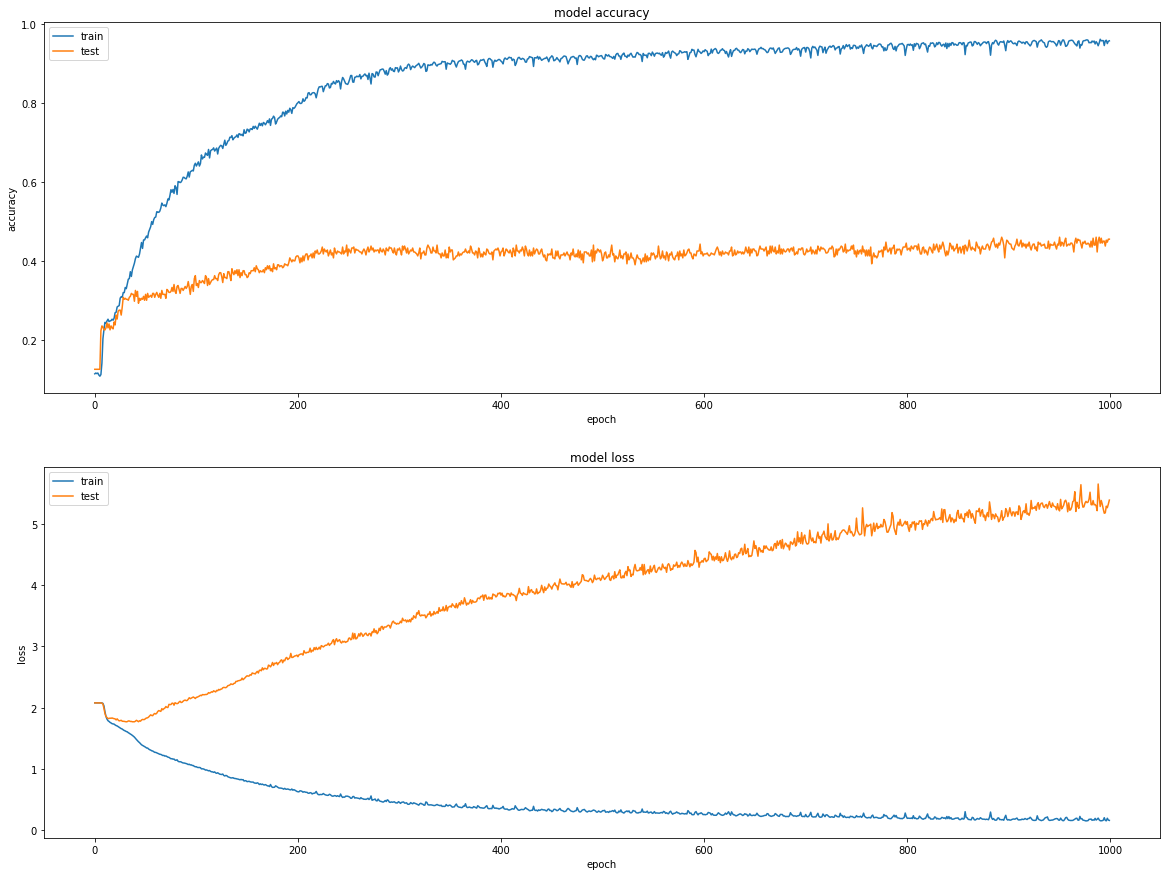

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [21]:
y_pred = model_trans.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[36  4  1  2  0  1  3  3]
 [ 2 19  1  6  5  8  5  4]
 [ 7  3 14  2  0  4 13  7]
 [ 3  9  1 22  7  3  0  5]
 [ 3  3  2  5 34  1  1  1]
 [ 0  7  8  4  3 18  4  6]
 [11  3 11  3  0  0 19  3]
 [ 7  3  5  8  0  2  5 20]]


In [22]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.52      0.72      0.61        50
    Chris Martin       0.37      0.38      0.38        50
      Emma Stone       0.33      0.28      0.30        50
      Jamie Foxx       0.42      0.44      0.43        50
      Steve Jobs       0.69      0.68      0.69        50
       Zac Efron       0.49      0.36      0.41        50
       Sandra Oh       0.38      0.38      0.38        50
   Taryn Manning       0.41      0.40      0.40        50

        accuracy                           0.46       400
       macro avg       0.45      0.46      0.45       400
    weighted avg       0.45      0.46      0.45       400



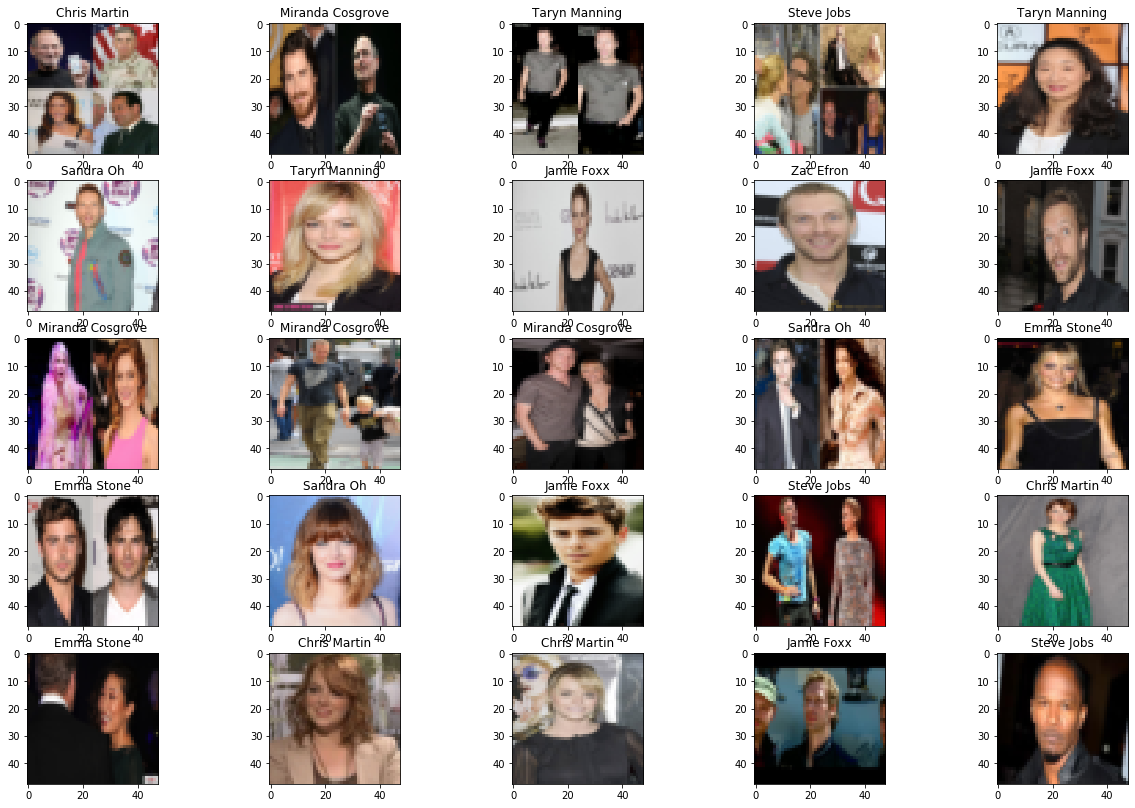

In [23]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1

## c)

In [24]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [25]:
pattern1 = re.compile("block[1-2]_conv2")
pattern2 = re.compile("block[3-5]_conv3")
new_model = Sequential()

dropout1 = 0.1
dropout2 = 0.25
dropout3 = 0.5
count1 = 1
count2 = 1

for layer in base_model.layers:
    layer.trainable = False
    new_model.add(layer)
    
    if re.match(pattern1, layer.name):
        new_layer = Dropout(dropout1, name=f"dropout{count1}_{dropout1}")
        new_layer.trainable = True
        new_model.add(new_layer)
        count1 += 1
        
    if re.match(pattern2, layer.name):
        new_layer = Dropout(dropout2, name=f"dropout{count2}_{dropout2}")
        new_layer.trainable = True
        new_model.add(new_layer)
        count2 += 1

new_model.add(Flatten())
new_model.add(Dense(512, activation='softmax', name='my_dense1', trainable=True))        
new_model.add(Dropout(dropout3, name=f"dropout{1}_{dropout3}"))
new_model.add(Dense(512, activation='softmax', name='my_dense2', trainable=True))        
new_model.add(Dropout(dropout3, name=f"dropout{2}_{dropout3}"))
new_model.add(Dense(100, activation='softmax', name='my_dense3', trainable=True)) 
new_model.add(Dropout(dropout3, name=f"dropout{3}_{dropout3}"))
new_model.add(Dense(8, activation='softmax', name='my_dense4', trainable=True)) 

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
dropout1_0.1 (Dropout)       (None, 48, 48, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
dropout2_0.1 (Dropout)       (None, 24, 24, 128)      

In [26]:
n_epochs = 1000
batch_size = 8
lr = 1e-4

x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

new_model.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
history = new_model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/1000
2000/2000 [==============================] - 5s 3ms/sample - loss: 2.0806 - accuracy: 0.1125 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0801 - accuracy: 0.1230 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0801 - accuracy: 0.1085 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 4/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0803 - accuracy: 0.1145 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0804 - accuracy: 0.1040 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 6/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0801 - accuracy: 0.1230 - val_loss: 2.0791 - val_accuracy: 0.1250
Epoch 7/1000
2000/2000 [==============================] - 4s 2ms/

Epoch 56/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.9037 - accuracy: 0.2210 - val_loss: 1.8272 - val_accuracy: 0.2975
Epoch 57/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.9022 - accuracy: 0.2280 - val_loss: 1.8226 - val_accuracy: 0.3300
Epoch 58/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.8925 - accuracy: 0.2375 - val_loss: 1.8151 - val_accuracy: 0.3275
Epoch 59/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.8898 - accuracy: 0.2360 - val_loss: 1.8230 - val_accuracy: 0.3275
Epoch 60/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.8906 - accuracy: 0.2430 - val_loss: 1.8272 - val_accuracy: 0.2850
Epoch 61/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.8964 - accuracy: 0.2255 - val_loss: 1.8304 - val_accuracy: 0.3125
Epoch 62/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.8944 - accuracy: 0.2325

Epoch 111/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.6086 - accuracy: 0.3275 - val_loss: 1.7498 - val_accuracy: 0.3300
Epoch 112/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.6080 - accuracy: 0.3235 - val_loss: 1.7691 - val_accuracy: 0.3300
Epoch 113/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.5926 - accuracy: 0.3155 - val_loss: 1.7609 - val_accuracy: 0.3250
Epoch 114/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.5976 - accuracy: 0.3445 - val_loss: 1.7959 - val_accuracy: 0.3125
Epoch 115/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.5785 - accuracy: 0.3205 - val_loss: 1.8504 - val_accuracy: 0.3000
Epoch 116/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.5944 - accuracy: 0.3285 - val_loss: 1.7561 - val_accuracy: 0.3200
Epoch 117/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.6063 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4659 - accuracy: 0.3745 - val_loss: 1.8550 - val_accuracy: 0.3300
Epoch 166/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4318 - accuracy: 0.3830 - val_loss: 1.9707 - val_accuracy: 0.3000
Epoch 167/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4284 - accuracy: 0.3980 - val_loss: 1.9320 - val_accuracy: 0.3250
Epoch 168/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4427 - accuracy: 0.3895 - val_loss: 1.7921 - val_accuracy: 0.3425
Epoch 169/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4223 - accuracy: 0.3975 - val_loss: 2.0326 - val_accuracy: 0.3100
Epoch 170/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4411 - accuracy: 0.3860 - val_loss: 1.9394 - val_accuracy: 0.3175
Epoch 171/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.4491 - accuracy: 0.3990 - val_l

Epoch 220/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.3430 - accuracy: 0.4395 - val_loss: 2.0169 - val_accuracy: 0.3500
Epoch 221/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.3221 - accuracy: 0.4490 - val_loss: 2.0384 - val_accuracy: 0.3450
Epoch 222/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.3132 - accuracy: 0.4550 - val_loss: 2.0089 - val_accuracy: 0.3425
Epoch 223/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.3285 - accuracy: 0.4520 - val_loss: 2.0225 - val_accuracy: 0.3425
Epoch 224/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.3389 - accuracy: 0.4605 - val_loss: 1.9573 - val_accuracy: 0.3575
Epoch 225/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2768 - accuracy: 0.4865 - val_loss: 2.0605 - val_accuracy: 0.3450
Epoch 226/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2864 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1852 - accuracy: 0.5340 - val_loss: 1.9279 - val_accuracy: 0.4325
Epoch 275/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1737 - accuracy: 0.5220 - val_loss: 2.0883 - val_accuracy: 0.3750
Epoch 276/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1855 - accuracy: 0.5310 - val_loss: 2.1325 - val_accuracy: 0.3875
Epoch 277/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.2172 - accuracy: 0.5075 - val_loss: 2.0997 - val_accuracy: 0.4000
Epoch 278/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1843 - accuracy: 0.5385 - val_loss: 2.0237 - val_accuracy: 0.4050
Epoch 279/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1921 - accuracy: 0.5210 - val_loss: 2.0712 - val_accuracy: 0.4050
Epoch 280/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1693 - accuracy: 0.5430 - val_l

Epoch 329/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1265 - accuracy: 0.5730 - val_loss: 2.3017 - val_accuracy: 0.3775
Epoch 330/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1212 - accuracy: 0.5645 - val_loss: 2.2004 - val_accuracy: 0.4000
Epoch 331/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1012 - accuracy: 0.5800 - val_loss: 2.2533 - val_accuracy: 0.3950
Epoch 332/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1243 - accuracy: 0.5630 - val_loss: 2.5363 - val_accuracy: 0.3500
Epoch 333/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1046 - accuracy: 0.5600 - val_loss: 2.2061 - val_accuracy: 0.4125
Epoch 334/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0929 - accuracy: 0.5600 - val_loss: 2.2312 - val_accuracy: 0.4050
Epoch 335/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.1127 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0635 - accuracy: 0.6005 - val_loss: 2.3855 - val_accuracy: 0.4175
Epoch 384/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0183 - accuracy: 0.6020 - val_loss: 2.4641 - val_accuracy: 0.3925
Epoch 385/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0549 - accuracy: 0.5830 - val_loss: 2.3900 - val_accuracy: 0.4125
Epoch 386/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0482 - accuracy: 0.6080 - val_loss: 2.3123 - val_accuracy: 0.4050
Epoch 387/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0326 - accuracy: 0.6030 - val_loss: 2.2115 - val_accuracy: 0.4325
Epoch 388/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0141 - accuracy: 0.6085 - val_loss: 2.3831 - val_accuracy: 0.3875
Epoch 389/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0347 - accuracy: 0.5980 - val_l

Epoch 438/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9572 - accuracy: 0.6240 - val_loss: 2.4209 - val_accuracy: 0.4125
Epoch 439/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9949 - accuracy: 0.6020 - val_loss: 2.4315 - val_accuracy: 0.4275
Epoch 440/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0062 - accuracy: 0.6050 - val_loss: 2.2942 - val_accuracy: 0.4200
Epoch 441/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9663 - accuracy: 0.6240 - val_loss: 2.3441 - val_accuracy: 0.4225
Epoch 442/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0096 - accuracy: 0.6130 - val_loss: 2.4101 - val_accuracy: 0.4275
Epoch 443/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 1.0023 - accuracy: 0.6150 - val_loss: 2.3438 - val_accuracy: 0.4325
Epoch 444/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9847 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9748 - accuracy: 0.6295 - val_loss: 2.5030 - val_accuracy: 0.4075
Epoch 493/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9098 - accuracy: 0.6500 - val_loss: 2.5100 - val_accuracy: 0.4150
Epoch 494/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9413 - accuracy: 0.6235 - val_loss: 2.5501 - val_accuracy: 0.4050
Epoch 495/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9293 - accuracy: 0.6320 - val_loss: 2.5509 - val_accuracy: 0.4125
Epoch 496/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9773 - accuracy: 0.6250 - val_loss: 2.5476 - val_accuracy: 0.3975
Epoch 497/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9652 - accuracy: 0.6070 - val_loss: 2.5937 - val_accuracy: 0.4275
Epoch 498/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9427 - accuracy: 0.6345 - val_l

Epoch 547/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9386 - accuracy: 0.6420 - val_loss: 2.5926 - val_accuracy: 0.4000
Epoch 548/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9032 - accuracy: 0.6405 - val_loss: 2.5465 - val_accuracy: 0.4100
Epoch 549/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9270 - accuracy: 0.6380 - val_loss: 2.5007 - val_accuracy: 0.4125
Epoch 550/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8953 - accuracy: 0.6375 - val_loss: 2.5797 - val_accuracy: 0.3950
Epoch 551/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9047 - accuracy: 0.6320 - val_loss: 2.4340 - val_accuracy: 0.4450
Epoch 552/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9180 - accuracy: 0.6345 - val_loss: 2.7220 - val_accuracy: 0.3900
Epoch 553/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9295 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9100 - accuracy: 0.6440 - val_loss: 2.6557 - val_accuracy: 0.4350
Epoch 602/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9025 - accuracy: 0.6410 - val_loss: 2.5880 - val_accuracy: 0.4050
Epoch 603/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9050 - accuracy: 0.6315 - val_loss: 2.6973 - val_accuracy: 0.4075
Epoch 604/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9256 - accuracy: 0.6295 - val_loss: 2.5608 - val_accuracy: 0.4225
Epoch 605/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8982 - accuracy: 0.6320 - val_loss: 2.5416 - val_accuracy: 0.4075
Epoch 606/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9053 - accuracy: 0.6480 - val_loss: 2.5637 - val_accuracy: 0.4125
Epoch 607/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8999 - accuracy: 0.6455 - val_l

Epoch 656/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8751 - accuracy: 0.6585 - val_loss: 2.4938 - val_accuracy: 0.4325
Epoch 657/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8809 - accuracy: 0.6545 - val_loss: 2.3702 - val_accuracy: 0.4300
Epoch 658/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9299 - accuracy: 0.6415 - val_loss: 2.4776 - val_accuracy: 0.4325
Epoch 659/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9036 - accuracy: 0.6630 - val_loss: 2.4420 - val_accuracy: 0.4500
Epoch 660/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8689 - accuracy: 0.6535 - val_loss: 2.6547 - val_accuracy: 0.4225
Epoch 661/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.9104 - accuracy: 0.6600 - val_loss: 2.6744 - val_accuracy: 0.4175
Epoch 662/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8858 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8797 - accuracy: 0.6720 - val_loss: 2.8382 - val_accuracy: 0.3800
Epoch 711/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8782 - accuracy: 0.6515 - val_loss: 2.5947 - val_accuracy: 0.4375
Epoch 712/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8704 - accuracy: 0.6655 - val_loss: 2.6180 - val_accuracy: 0.4300
Epoch 713/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8842 - accuracy: 0.6640 - val_loss: 2.7221 - val_accuracy: 0.4025
Epoch 714/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8506 - accuracy: 0.6550 - val_loss: 2.6999 - val_accuracy: 0.4200
Epoch 715/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8578 - accuracy: 0.6830 - val_loss: 2.6677 - val_accuracy: 0.4050
Epoch 716/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8727 - accuracy: 0.6565 - val_l

Epoch 765/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8838 - accuracy: 0.6645 - val_loss: 2.5295 - val_accuracy: 0.4175
Epoch 766/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8500 - accuracy: 0.6705 - val_loss: 2.4847 - val_accuracy: 0.4475
Epoch 767/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8625 - accuracy: 0.6710 - val_loss: 2.6429 - val_accuracy: 0.4275
Epoch 768/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8793 - accuracy: 0.6585 - val_loss: 2.6887 - val_accuracy: 0.4025
Epoch 769/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8951 - accuracy: 0.6520 - val_loss: 2.6748 - val_accuracy: 0.3975
Epoch 770/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8472 - accuracy: 0.6775 - val_loss: 2.6558 - val_accuracy: 0.4200
Epoch 771/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8156 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8421 - accuracy: 0.6770 - val_loss: 2.6377 - val_accuracy: 0.4075
Epoch 820/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7909 - accuracy: 0.6765 - val_loss: 2.6213 - val_accuracy: 0.4225
Epoch 821/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8271 - accuracy: 0.6740 - val_loss: 2.6383 - val_accuracy: 0.4175
Epoch 822/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8678 - accuracy: 0.6665 - val_loss: 2.5201 - val_accuracy: 0.4250
Epoch 823/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8269 - accuracy: 0.6685 - val_loss: 2.6582 - val_accuracy: 0.4250
Epoch 824/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8299 - accuracy: 0.6855 - val_loss: 2.7051 - val_accuracy: 0.4125
Epoch 825/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8378 - accuracy: 0.6745 - val_l

Epoch 874/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8366 - accuracy: 0.6930 - val_loss: 2.5458 - val_accuracy: 0.4450
Epoch 875/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7964 - accuracy: 0.6825 - val_loss: 2.5914 - val_accuracy: 0.4175
Epoch 876/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7862 - accuracy: 0.6930 - val_loss: 2.6803 - val_accuracy: 0.4125
Epoch 877/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8183 - accuracy: 0.6870 - val_loss: 2.6121 - val_accuracy: 0.4225
Epoch 878/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8418 - accuracy: 0.6850 - val_loss: 2.7131 - val_accuracy: 0.4075
Epoch 879/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8162 - accuracy: 0.6755 - val_loss: 2.6629 - val_accuracy: 0.4375
Epoch 880/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8541 - accuracy:

2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7914 - accuracy: 0.6760 - val_loss: 2.7130 - val_accuracy: 0.4125
Epoch 929/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8071 - accuracy: 0.6715 - val_loss: 2.6140 - val_accuracy: 0.4200
Epoch 930/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7898 - accuracy: 0.6825 - val_loss: 2.6429 - val_accuracy: 0.4300
Epoch 931/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7957 - accuracy: 0.6945 - val_loss: 2.6226 - val_accuracy: 0.4375
Epoch 932/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8140 - accuracy: 0.6860 - val_loss: 2.5402 - val_accuracy: 0.4400
Epoch 933/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8022 - accuracy: 0.6945 - val_loss: 2.5446 - val_accuracy: 0.4425
Epoch 934/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7956 - accuracy: 0.6850 - val_l

Epoch 983/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7840 - accuracy: 0.6950 - val_loss: 2.6064 - val_accuracy: 0.4600
Epoch 984/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8002 - accuracy: 0.6850 - val_loss: 2.4842 - val_accuracy: 0.4575
Epoch 985/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7973 - accuracy: 0.6950 - val_loss: 2.4820 - val_accuracy: 0.4625
Epoch 986/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8235 - accuracy: 0.6805 - val_loss: 2.6607 - val_accuracy: 0.4250
Epoch 987/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7953 - accuracy: 0.6980 - val_loss: 2.6546 - val_accuracy: 0.4450
Epoch 988/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.7750 - accuracy: 0.6960 - val_loss: 2.4512 - val_accuracy: 0.4575
Epoch 989/1000
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.8084 - accuracy:

In [27]:
score_train = new_model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = new_model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.7775624694824219
Accuracy train set: 0.7014999985694885

Loss validation set: 2.5325074863433836
Accuracy validation set: 0.4350000023841858



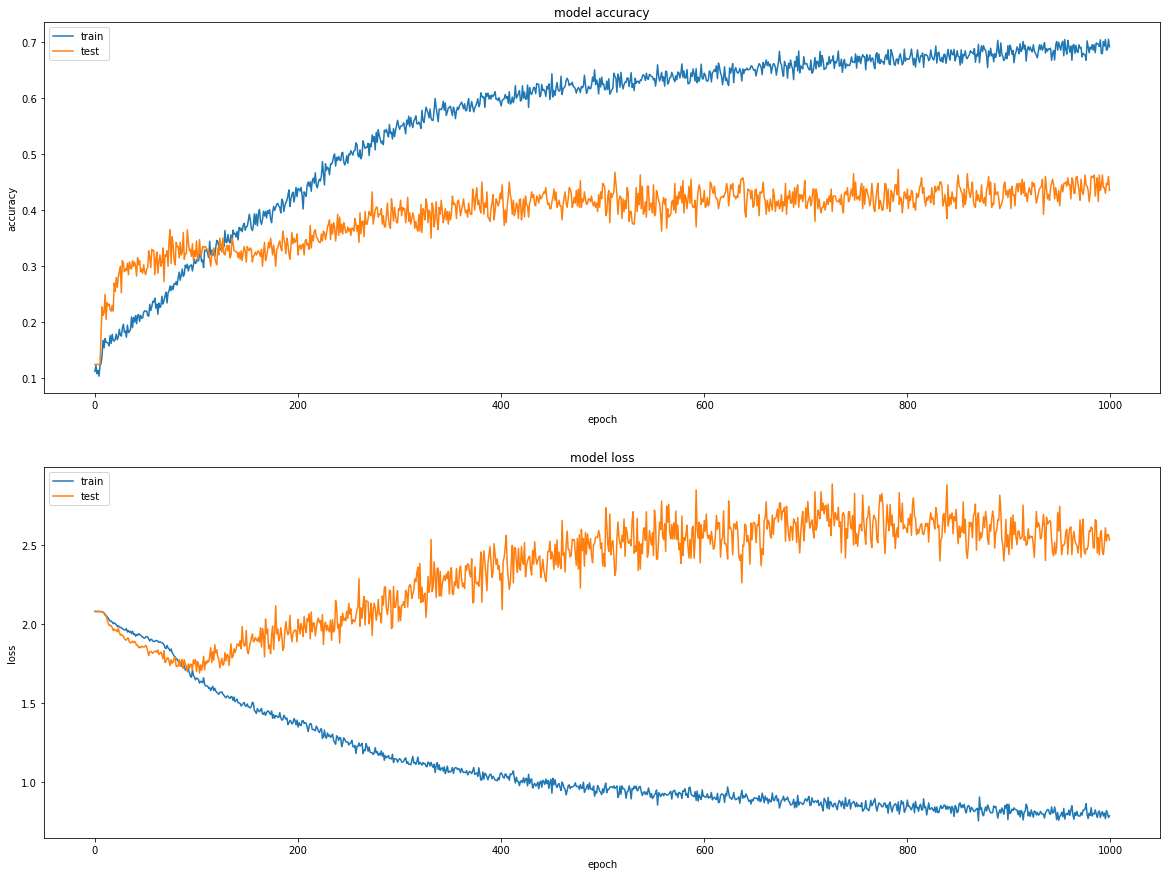

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [29]:
y_pred = new_model.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[20  0 26  1  0  0  3  0]
 [ 9  6  4  8  7  4 12  0]
 [13  0 33  0  0  1  2  1]
 [ 9  1  4 31  3  0  2  0]
 [ 7  0  2  3 36  0  2  0]
 [13  0  5 10  1 15  5  1]
 [21  0  2  1  1  0 25  0]
 [19  0  6  2  0  0 15  8]]


In [30]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.18      0.40      0.25        50
    Chris Martin       0.86      0.12      0.21        50
      Emma Stone       0.40      0.66      0.50        50
      Jamie Foxx       0.55      0.62      0.58        50
      Steve Jobs       0.75      0.72      0.73        50
       Zac Efron       0.75      0.30      0.43        50
       Sandra Oh       0.38      0.50      0.43        50
   Taryn Manning       0.80      0.16      0.27        50

        accuracy                           0.43       400
       macro avg       0.58      0.44      0.43       400
    weighted avg       0.58      0.43      0.43       400



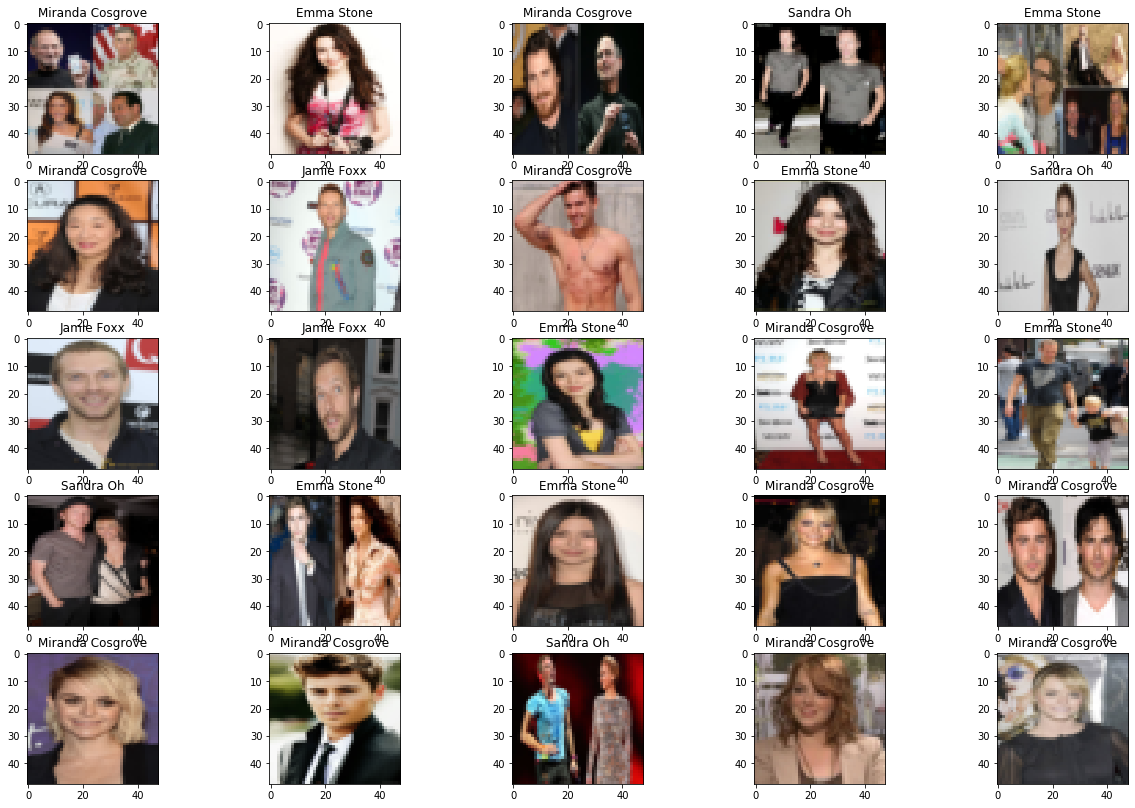

In [31]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1